### Quantum Representations of Audio

In [1]:
import quantumaudio
from quantumaudio import utils

### Contents

- Example with 3 Basic Schemes
- Example with 2 Multi-channel Schemes
- Audio Example

#### Part A) Example with 3 Basic Schemes

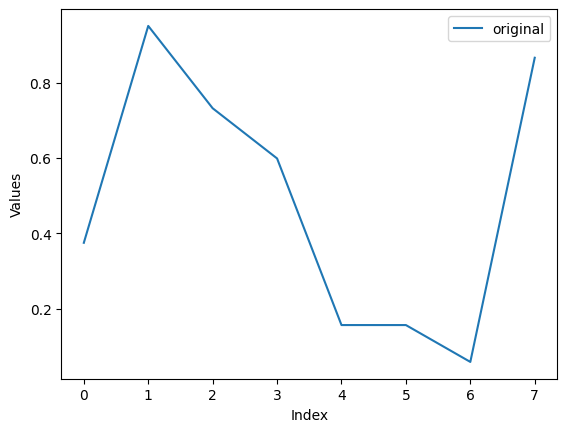

In [2]:
signal = utils.simulate_data(8)
utils.plot(signal)

#### Scheme 1 - Quantum Probability Amplitude Modulation (QPAM)

In [3]:
qpam = quantumaudio.load('qpam')

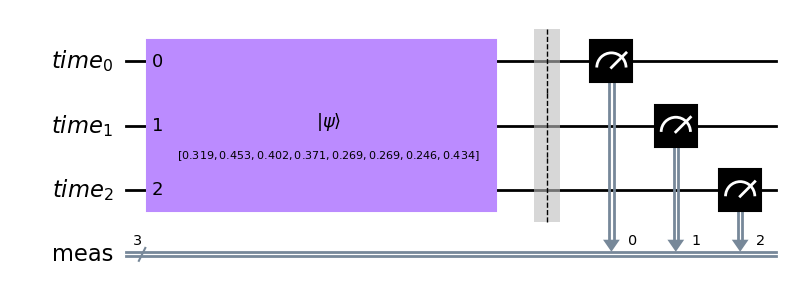

In [4]:
circuit_1 = qpam.encode(signal)
circuit_1.draw('mpl',style='clifford')

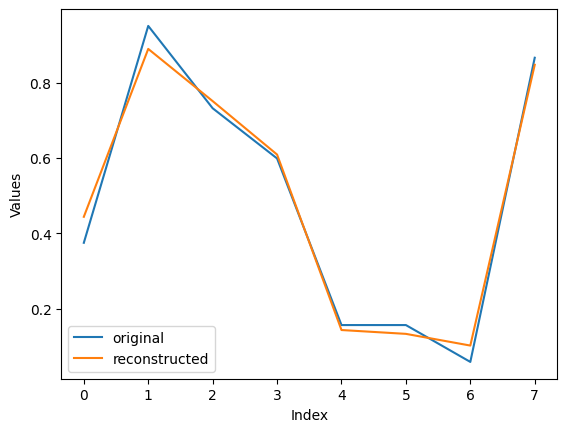

In [5]:
utils.plot([signal,qpam.decode(circuit_1)])

In [6]:
utils.tune(circuit_1,function=qpam.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function quantumaudio.utils.tune.<locals>.plot_function(shots)>

#### Scheme 2 - Single-Qubit Probability Amplitude Modulation (SQPAM)

In [7]:
sqpam = quantumaudio.load('sqpam')

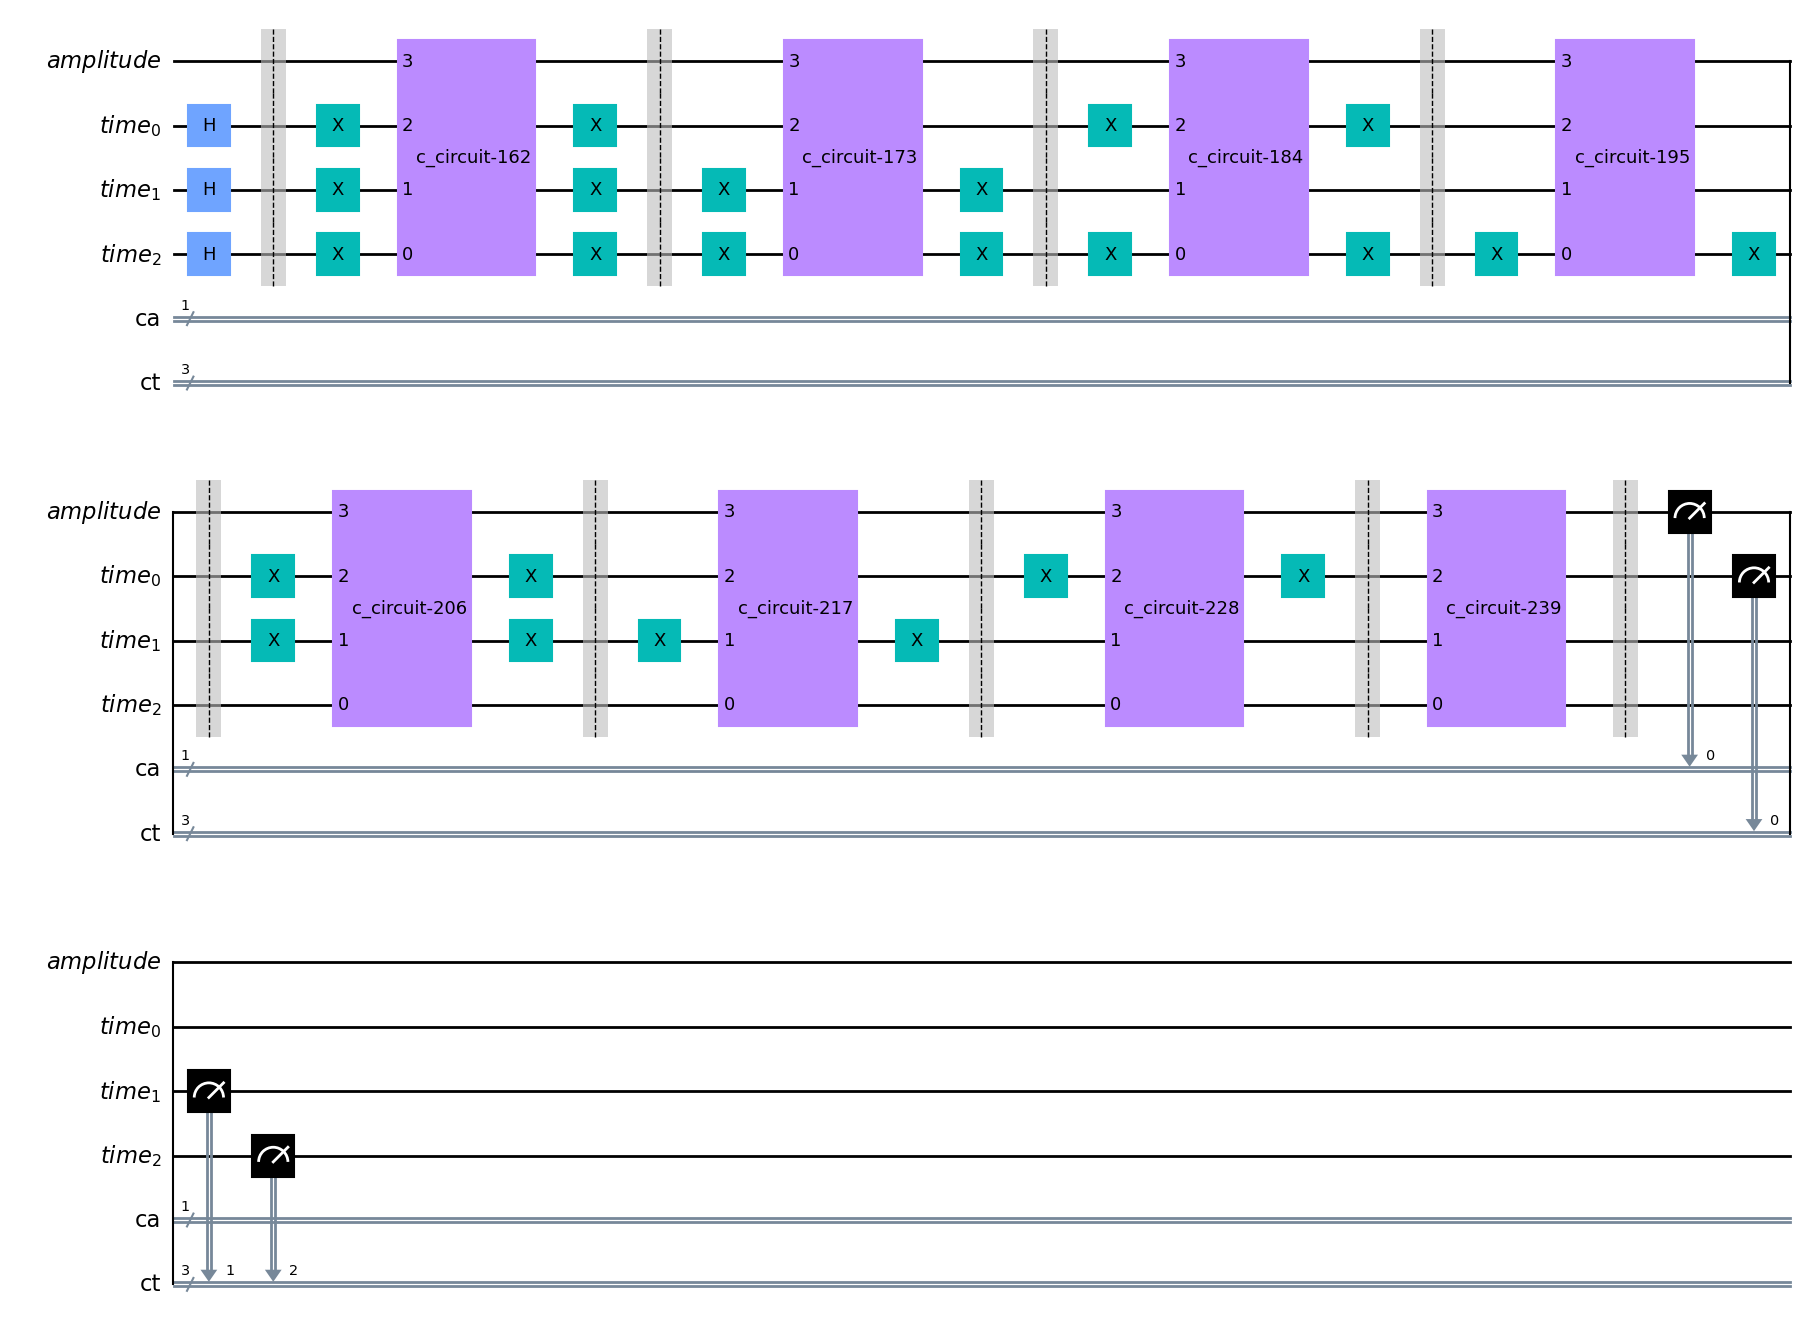

In [8]:
circuit_2 = sqpam.encode(signal)
circuit_2.draw('mpl',style='clifford')

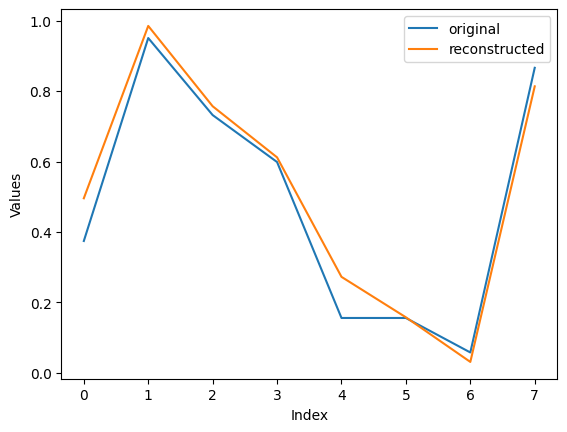

In [9]:
utils.plot([signal,sqpam.decode(circuit_2)])

In [10]:
utils.tune(circuit_2,function=sqpam.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function quantumaudio.utils.tune.<locals>.plot_function(shots)>

#### Scheme 3 - Quantum State Modulation (QSM) Scheme

In [11]:
qsm = quantumaudio.load('qsm')

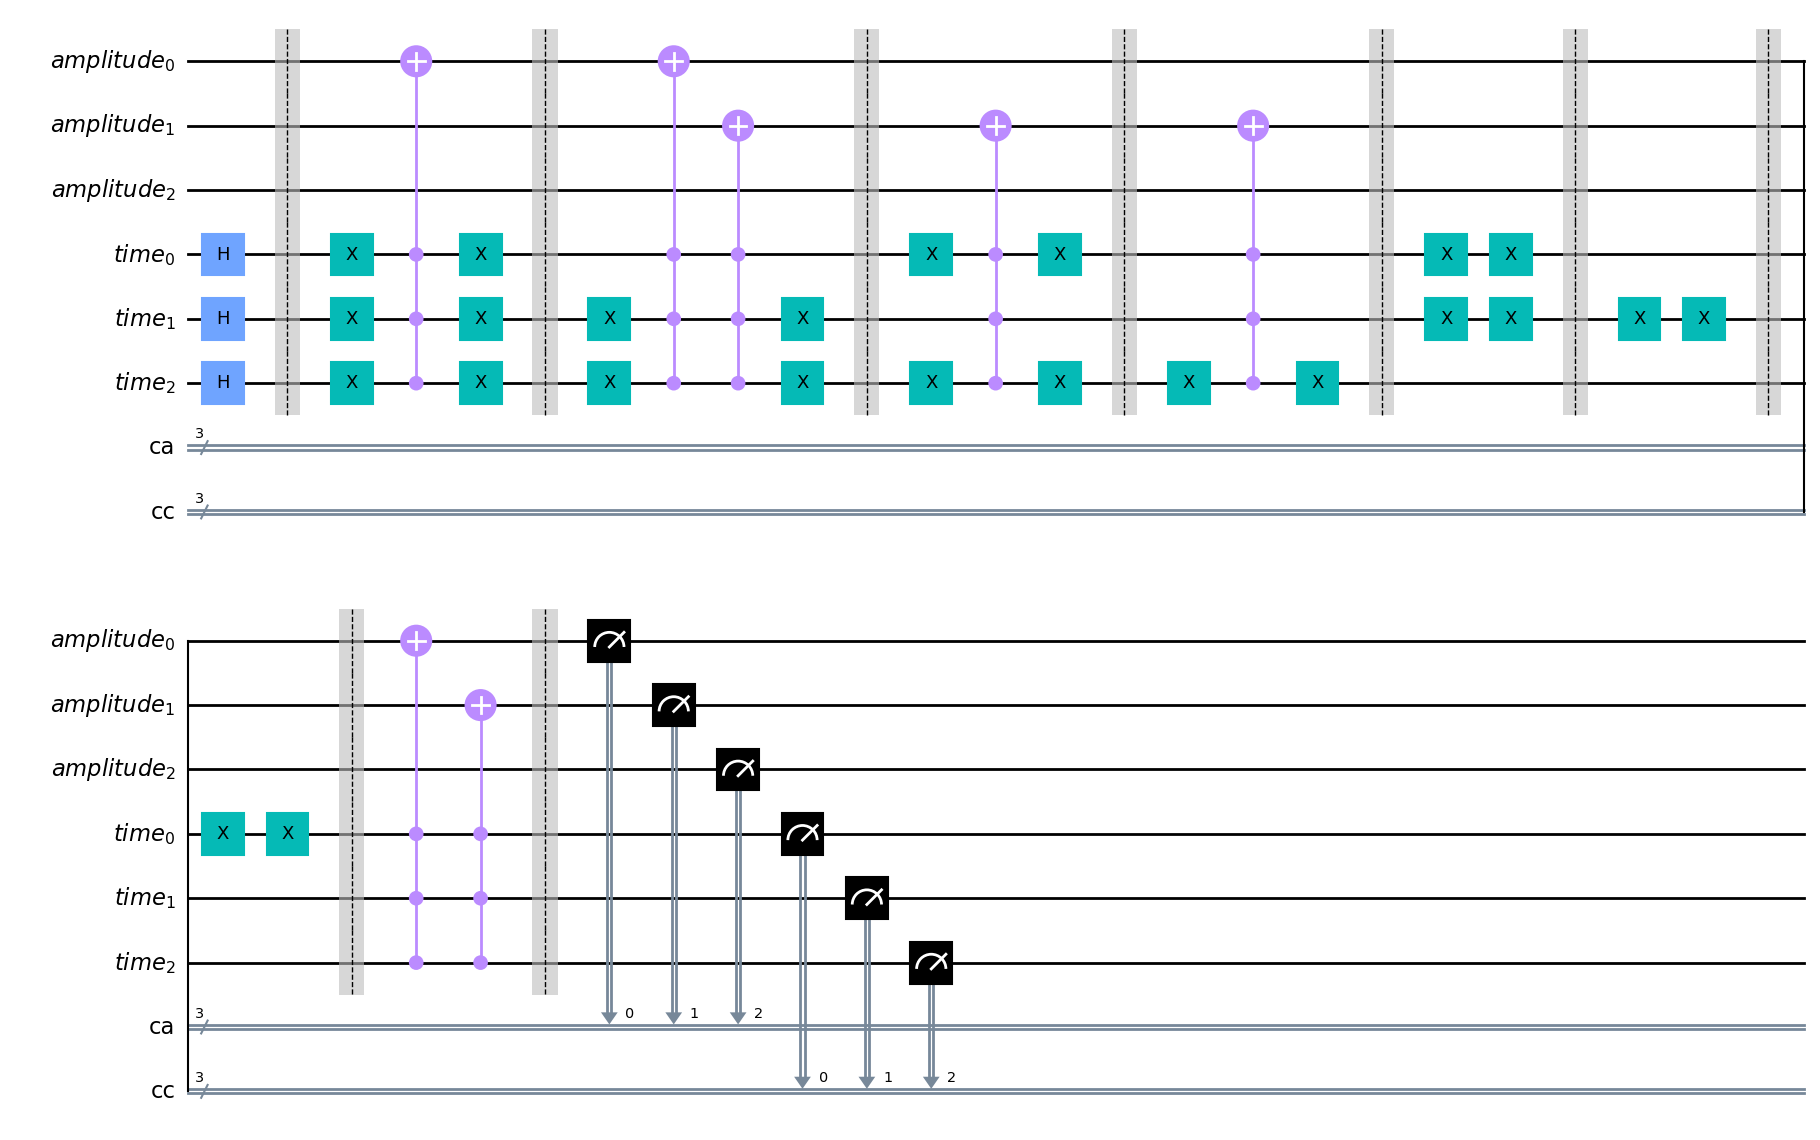

In [12]:
circuit_3 = qsm.encode(signal)
circuit_3.draw('mpl',style='clifford')

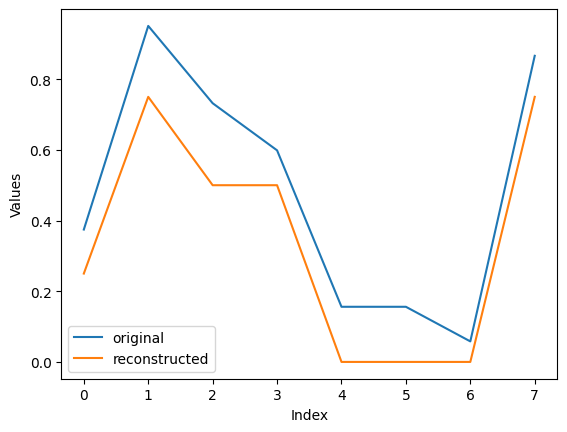

In [13]:
utils.plot([signal,qsm.decode(circuit_3)])

In [14]:
utils.tune(circuit_3,function=qsm.decode,step=2,max_value=4000,ref=signal)

interactive(children=(IntSlider(value=1, description='Shots', max=4000, min=1, step=2), Output()), _dom_classe…

<function quantumaudio.utils.tune.<locals>.plot_function(shots)>

#### Part B) Multi-channel Signal Example with 2 Schemes

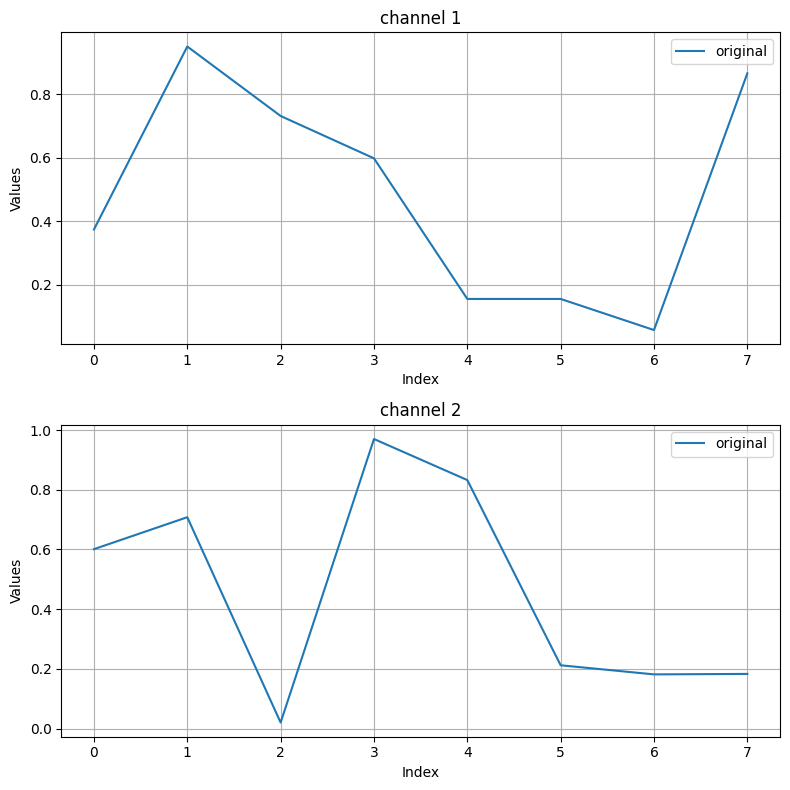

In [15]:
two_d_signal = utils.simulate_data(2,8)
utils.plot(two_d_signal)

#### Scheme 1 - Multi-Channel SQPAM

In [16]:
msqpam = quantumaudio.load('msqpam')

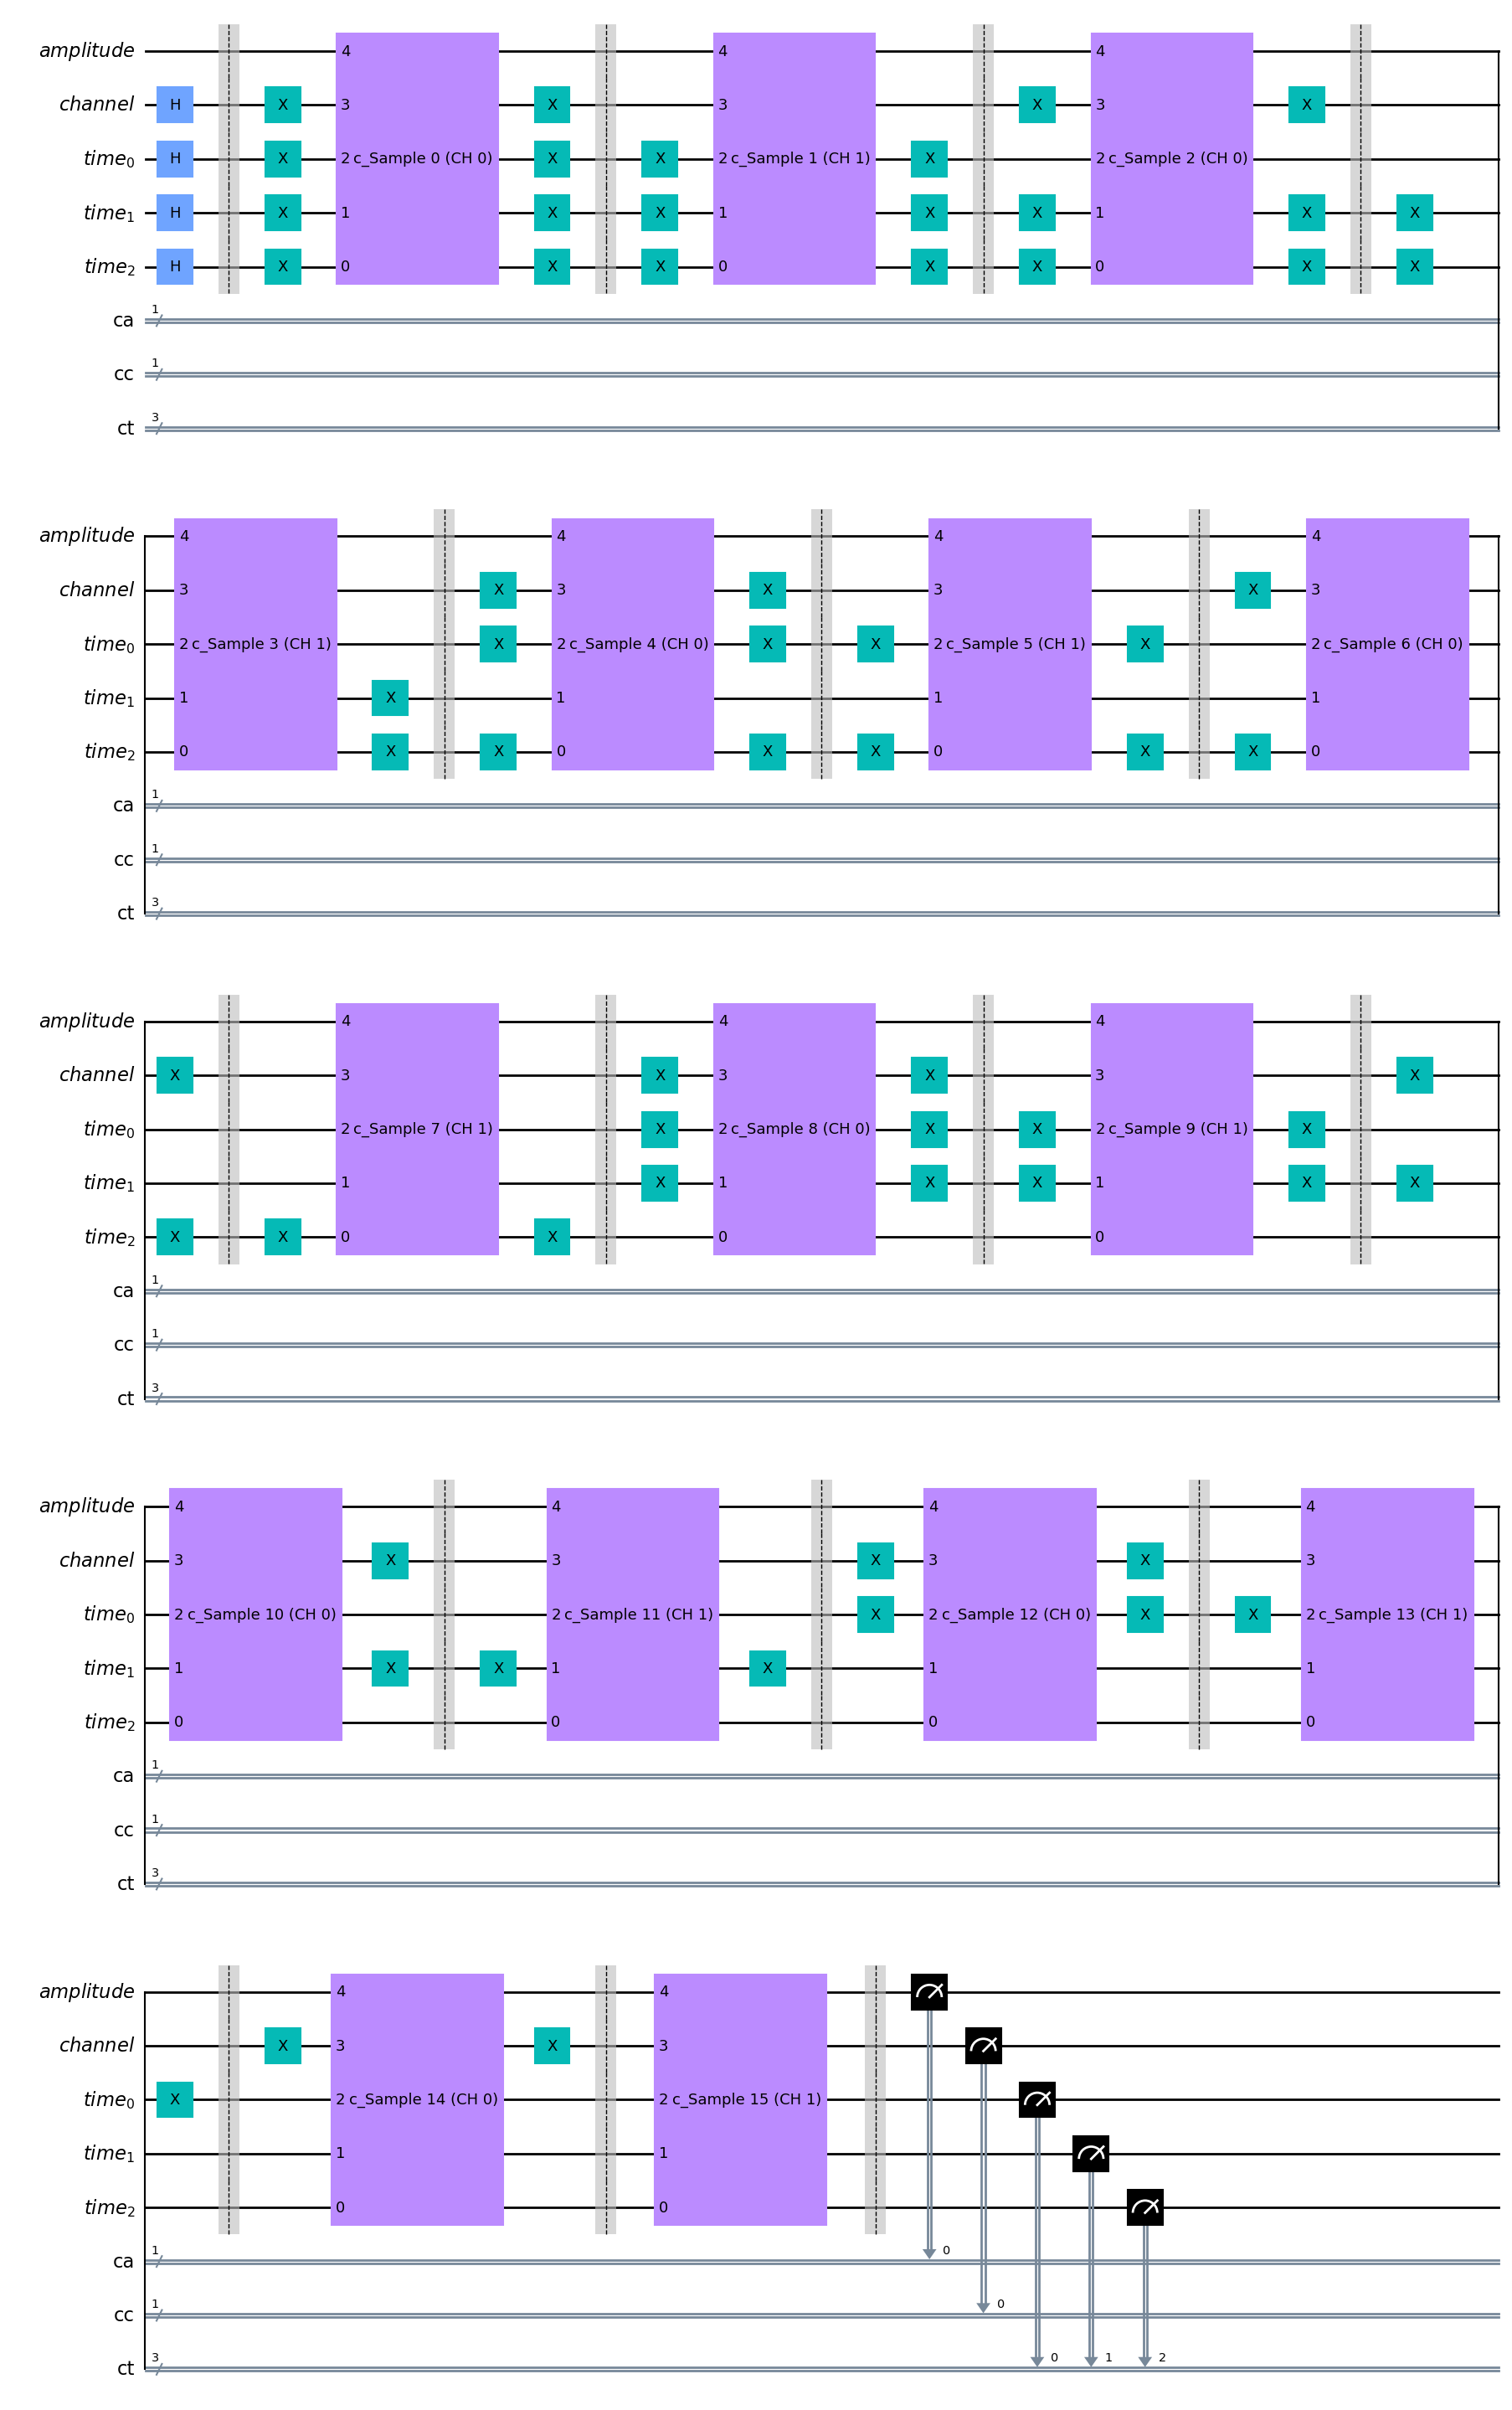

In [17]:
circuit_4 = msqpam.encode(two_d_signal)
circuit_4.draw('mpl',style='clifford')

In [18]:
reconstructed_signal = msqpam.decode(circuit_4)

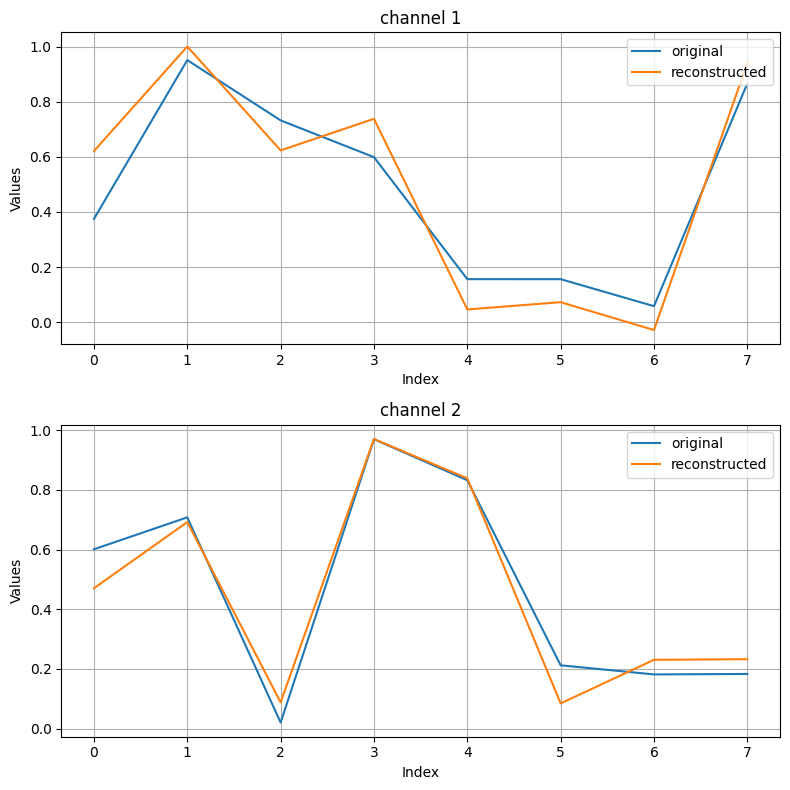

In [19]:
utils.plot([two_d_signal,reconstructed_signal])

#### Scheme 2 - Multi-channel QSM

In [20]:
mqsm = quantumaudio.load('mqsm')

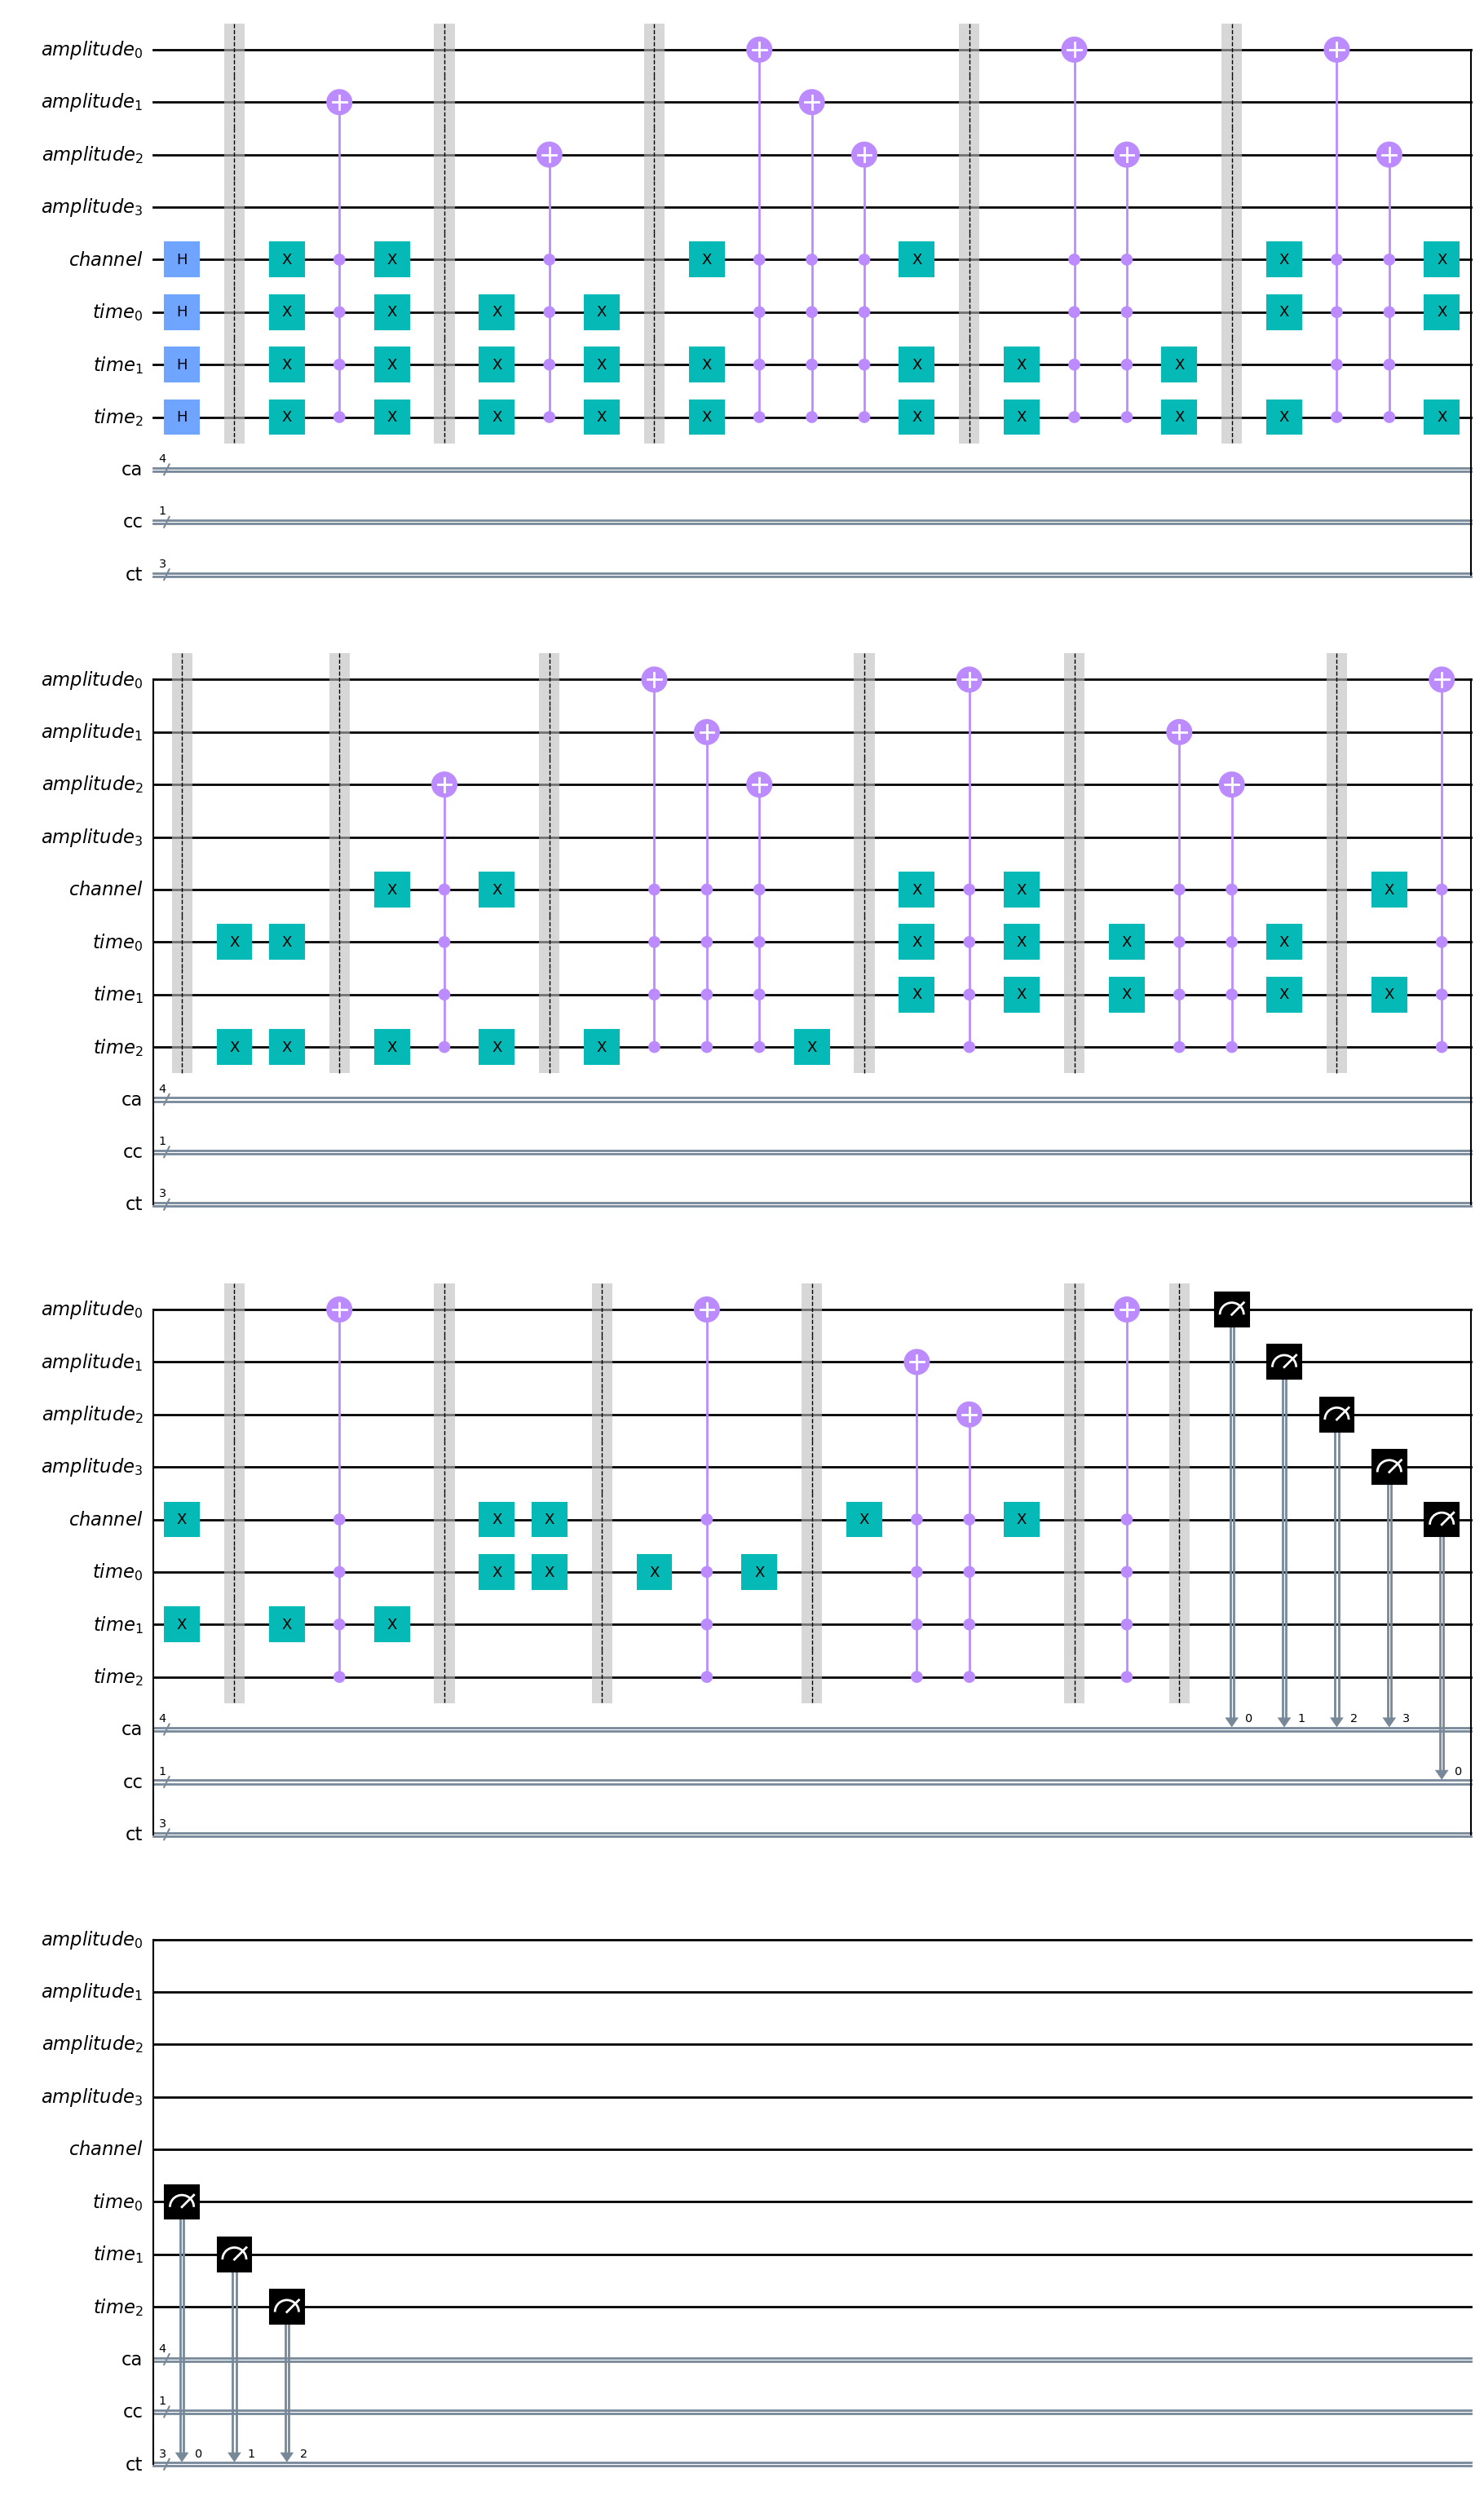

In [21]:
circuit_5 = mqsm.encode(two_d_signal)
circuit_5.draw('mpl',style='clifford')

In [22]:
reconstructed_signal = mqsm.decode(circuit_5)

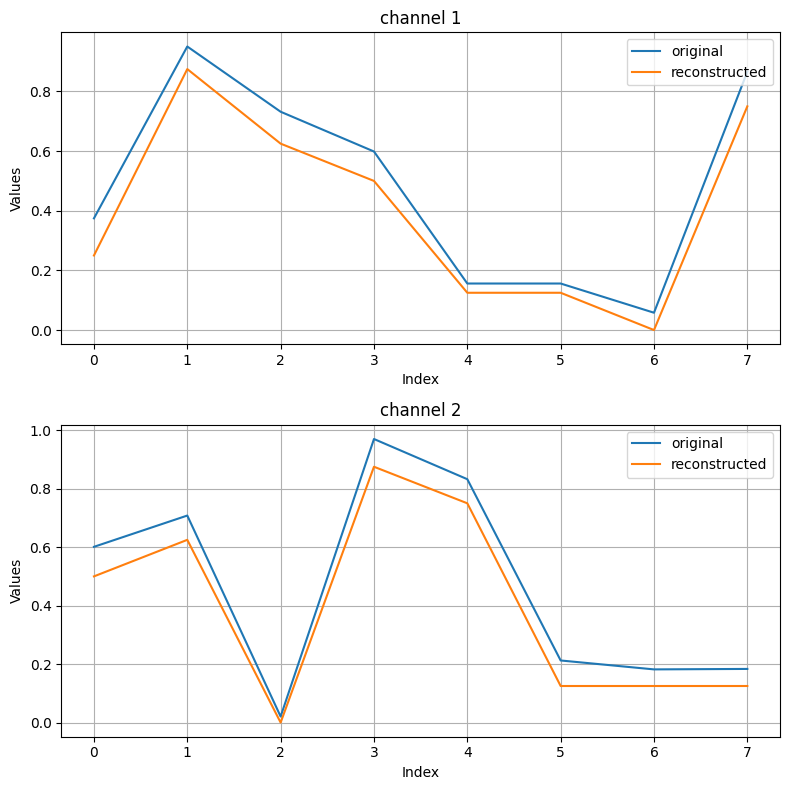

In [23]:
utils.plot([two_d_signal,reconstructed_signal])

#### More Channel

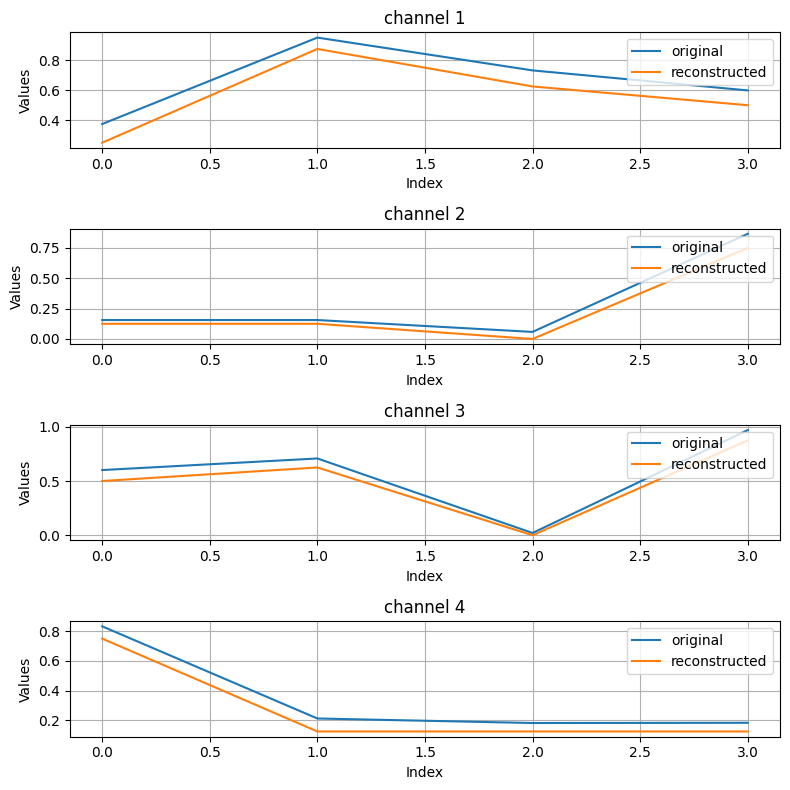

In [24]:
four_d_signal = utils.simulate_data(4,4)
utils.plot([four_d_signal,mqsm.decode(mqsm.encode(four_d_signal))])

#### Part C) Audio Example

In [25]:
path = 'audio_samples/lead_guitar.mp3'

In [26]:
y,sr = utils.get_chunks(file_path=path,sr=8000,mono=True,preview=True)

Shape: (36154,)
Num samples: 36154, Num channels: 1, Sample rate: 8000, Buffer size: 256
Number of chunks: 142
Shape per buffer: (1, 256)


##### Quantum Probability Amplitude Modulation (QPAM)

In [27]:
utils.tune_audio(obj=y,sr=sr,scheme=qpam,function=utils.process_chunks,limit=None,offset=0,max_value=10000)

interactive(children=(IntSlider(value=1, continuous_update=False, description='Shots', max=10000, min=1, step=…

<function quantumaudio.utils.tune_audio.<locals>.plot_function(shots)>